# Initialise libraries

In [37]:
import pandas as pa
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Load house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods. The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [20]:
regressionDir = '/home/weenkus/workspace/Machine Learning - University of Washington/Regression'
sales = pa.read_csv(regressionDir + '/datasets/Philadelphia_Crime_Rate_noNA.csv')
sales

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25,8.0,Aston,Delaware
3,110490,11.0490,49.4,25,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19,3.9,Bristol B.,Bucks
5,92634,9.2634,48.6,20,0.6,Bristol T.,Bucks
6,89246,8.9246,30.8,15,-2.6,Brookhaven,Delaware
7,195145,19.5145,10.8,20,-3.5,Bryn Athyn,Montgome
8,297342,29.7342,20.2,14,0.6,Bryn Mawr,Montgome
9,264298,26.4298,20.4,26,6.0,Buckingham,Bucks


In [21]:
# Show plots in jupyter
%matplotlib inline

# Exploring the data

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

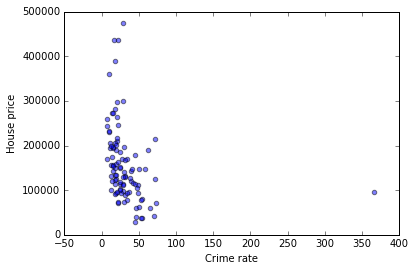

In [34]:
plt.scatter(sales.CrimeRate, sales.HousePrice, alpha=0.5)
plt.ylabel('House price')
plt.xlabel('Crime rate')

# Fit the regression model using crime as the feature

In [77]:
# Check the type and shape
X = sales[['CrimeRate']]
print (type(X))
print (X.shape)


y = sales['HousePrice']
print (type(y))
print (y.shape)

<class 'pandas.core.frame.DataFrame'>
(99, 1)
<class 'pandas.core.series.Series'>
(99,)


In [79]:
crime_model = linear_model.LinearRegression()
crime_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Let's see what our fit looks like

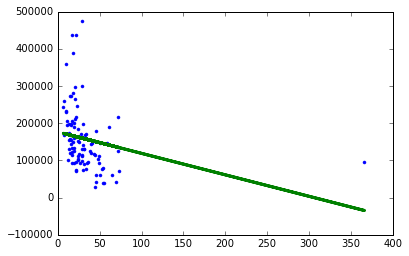

In [87]:
plt.plot(sales.CrimeRate, sales.HousePrice, '.',
    X, crime_model.predict(X), '-',
         linewidth=3)